In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('star_dataset.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


## 1. Consider three nominal features
One of them, not more, may be taken from nominal features in your data

In [3]:
# Numerical features
num_features = [
    'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'
]

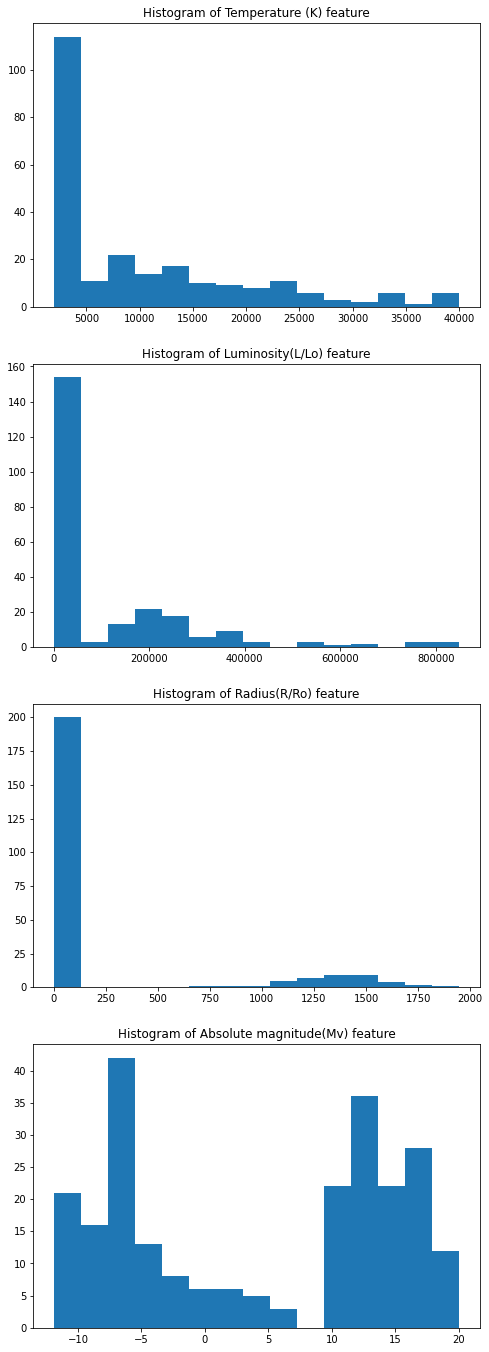

In [4]:
fig, axs = plt.subplots(len(num_features), figsize=(8, 24))
for i, feature in enumerate(num_features):
    axs[i].hist(df[feature], int(np.round(np.sqrt(df.shape[0]))))
    axs[i].set_title('Histogram of %s feature' % feature)

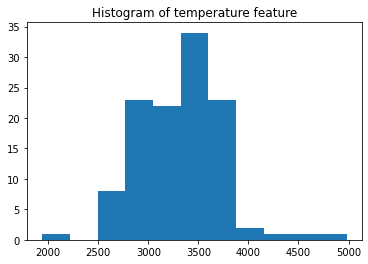

In [5]:
temperature = df['Temperature (K)']
temperature_limit = temperature[temperature < 5000]

plt.hist(temperature_limit, int(np.round(np.sqrt(temperature_limit.shape[0]))))
plt.title("Histogram of temperature feature")
plt.show()

In [6]:
def get_block(value, blocks_limit):
    for i, x in enumerate(blocks_limit):
        if value < x:
            return i
    return 0

In [7]:
temperature_blocks_limit = [3000, 3500, 4500, 10000, 15000, 40000]
df['Temperature_block'] = df['Temperature (K)'].apply(lambda x: get_block(x, temperature_blocks_limit))

In [8]:
absolute_magnitude_blocks_limit = [-10, -5, 5, 12, 15, 20]
df['Absolute_magnitude_blocks'] = df['Absolute magnitude(Mv)'].apply(lambda x: get_block(x, absolute_magnitude_blocks_limit))

We choose three features: `Star type`, `Temperature` and `Absolute magnitude`. 

`Temperature` and `Absolute magnitude` were splited on 6 blocks and we will use them as nominal features.

In [9]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Temperature_block,Absolute_magnitude_blocks
0,3068,0.002400,0.1700,16.12,0,Red,M,1,5
1,3042,0.000500,0.1542,16.60,0,Red,M,1,5
2,2600,0.000300,0.1020,18.70,0,Red,M,0,5
3,2800,0.000200,0.1600,16.65,0,Red,M,0,5
4,1939,0.000138,0.1030,20.06,0,Red,M,0,0
...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,5,1
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,5,0
237,8829,537493.000000,1423.0000,-10.73,5,White,A,3,0
238,9235,404940.000000,1112.0000,-11.23,5,White,A,3,0


In [10]:
features = ['Star type', 'Temperature_block', 'Absolute_magnitude_blocks']

for feature in features:
    counts = df[feature].value_counts()
    print(counts)
    print()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

5    59
1    45
2    39
3    36
0    31
4    30
Name: Temperature_block, dtype: int64

1    61
4    48
5    38
3    37
2    35
0    21
Name: Absolute_magnitude_blocks, dtype: int64



## 2. Build two contingency tables over them
Present a conditional frequency table and Quetelet relative index tables. Make comments on relations between categories of the common (to both tables) feature and two others.

In [221]:
_TOTAL = 'total'

def q_index(cond_row):
    _total = cond_row[_TOTAL]
    return cond_row.apply(
        lambda x: (x-_total)/_total if x != _total else _total
    )

## Contingency tables

Table for feature `Star type` and `Temperature`

In [83]:
type_temperature = pd.crosstab(
    df['Temperature_block'],
    df['Star type'],
    margins = True,
    margins_name=_TOTAL,
    rownames=['Temperature'],
    colnames=['Star type']
)
type_temperature

Star type,0,1,2,3,4,5,total
Temperature,,,,,,,
0,24,6,0,0,1,0,31
1,13,23,0,0,4,5,45
2,3,11,0,1,5,19,39
3,0,0,11,16,6,3,36
4,0,0,15,6,7,2,30
5,0,0,14,17,17,11,59
total,40,40,40,40,40,40,240


In [133]:
type_temperature_prob = pd.crosstab(
    df['Temperature_block'],
    df['Star type'],
    margins = True,
    margins_name=_TOTAL,
    rownames=['Temperature Prob'],
    colnames=['Star type'],
    normalize='all'
)
type_temperature_prob

Star type,0,1,2,3,4,5,total
Temperature Prob,,,,,,,
0,0.100000,0.025000,0.000000,0.000000,0.004167,0.000000,0.129167
1,0.054167,0.095833,0.000000,0.000000,0.016667,0.020833,0.187500
2,0.012500,0.045833,0.000000,0.004167,0.020833,0.079167,0.162500
3,0.000000,0.000000,0.045833,0.066667,0.025000,0.012500,0.150000
4,0.000000,0.000000,0.062500,0.025000,0.029167,0.008333,0.125000
5,0.000000,0.000000,0.058333,0.070833,0.070833,0.045833,0.245833
total,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.000000


Table for feature `Star type` and `Absolute magnitude`

In [85]:
type_magnitude = pd.crosstab(
    df['Absolute_magnitude_blocks'],
    df['Star type'],
    margins = True,
    margins_name=_TOTAL,
    rownames=['Absolute magnitude'],
    colnames=['Star type']
)
type_magnitude

Star type,0,1,2,3,4,5,total
Absolute magnitude,,,,,,,
0,2,0,0,0,0,19,21
1,0,0,0,0,40,21,61
2,0,0,0,35,0,0,35
3,0,17,15,5,0,0,37
4,0,23,25,0,0,0,48
5,38,0,0,0,0,0,38
total,40,40,40,40,40,40,240


In [86]:
type_magnitude_prob = pd.crosstab(
    df['Absolute_magnitude_blocks'],
    df['Star type'],
    margins = True,
    margins_name=_TOTAL,
    rownames=['Absolute magnitude'],
    colnames=['Star type'],
    normalize='all'
)
type_magnitude_prob

Star type,0,1,2,3,4,5,total
Absolute magnitude,,,,,,,
0,0.008333,0.000000,0.000000,0.000000,0.000000,0.079167,0.087500
1,0.000000,0.000000,0.000000,0.000000,0.166667,0.087500,0.254167
2,0.000000,0.000000,0.000000,0.145833,0.000000,0.000000,0.145833
3,0.000000,0.070833,0.062500,0.020833,0.000000,0.000000,0.154167
4,0.000000,0.095833,0.104167,0.000000,0.000000,0.000000,0.200000
5,0.158333,0.000000,0.000000,0.000000,0.000000,0.000000,0.158333
total,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.000000


### Conditional Probabilities

Table for feature `Star type` and `Temperature`

In [91]:
type_temperature_cond = pd.crosstab(
    df['Temperature_block'],
    df['Star type'],
    margins = True,
    margins_name=_TOTAL,
    rownames=['Temperature_cond'],
    colnames=['Star type'],
    normalize='columns'
)
type_temperature_cond

Star type,0,1,2,3,4,5,total
Temperature,,,,,,,
0,0.600,0.150,0.000,0.000,0.025,0.000,0.129167
1,0.325,0.575,0.000,0.000,0.100,0.125,0.187500
2,0.075,0.275,0.000,0.025,0.125,0.475,0.162500
3,0.000,0.000,0.275,0.400,0.150,0.075,0.150000
4,0.000,0.000,0.375,0.150,0.175,0.050,0.125000
5,0.000,0.000,0.350,0.425,0.425,0.275,0.245833


Table for feature `Star type` and `Absolute magnitude`

In [88]:
type_magnitude_cond = pd.crosstab(
    df['Absolute_magnitude_blocks'],
    df['Star type'],
    margins = True,
    margins_name=_TOTAL,
    rownames=['Absolute magnitude'],
    colnames=['Star type'],
    normalize='columns'
)
type_magnitude_cond

Star type,0,1,2,3,4,5,total
Absolute magnitude,,,,,,,
0,0.05,0.000,0.000,0.000,0.0,0.475,0.087500
1,0.00,0.000,0.000,0.000,1.0,0.525,0.254167
2,0.00,0.000,0.000,0.875,0.0,0.000,0.145833
3,0.00,0.425,0.375,0.125,0.0,0.000,0.154167
4,0.00,0.575,0.625,0.000,0.0,0.000,0.200000
5,0.95,0.000,0.000,0.000,0.0,0.000,0.158333


In [121]:
type_temperature_quetelet = type_temperature_cond.apply(q_index, axis=1)
type_temperature_quetelet

Star type,0,1,2,3,4,5,total
Temperature,,,,,,,
0,3.645161,0.161290,-1.000000,-1.000000,-0.806452,-1.000000,0.129167
1,0.733333,2.066667,-1.000000,-1.000000,-0.466667,-0.333333,0.187500
2,-0.538462,0.692308,-1.000000,-0.846154,-0.230769,1.923077,0.162500
3,-1.000000,-1.000000,0.833333,1.666667,0.150000,-0.500000,0.150000
4,-1.000000,-1.000000,2.000000,0.200000,0.400000,-0.600000,0.125000
5,-1.000000,-1.000000,0.423729,0.728814,0.728814,0.118644,0.245833


In [155]:
type_magnitude_quetelet = type_magnitude_cond.apply(q_index, axis=1)
type_magnitude_quetelet

Star type,0,1,2,3,4,5,total
Absolute magnitude,,,,,,,
0,-0.428571,-1.000000,-1.000000,-1.000000,-1.000000,4.428571,0.087500
1,-1.000000,-1.000000,-1.000000,-1.000000,2.934426,1.065574,0.254167
2,-1.000000,-1.000000,-1.000000,5.000000,-1.000000,-1.000000,0.145833
3,-1.000000,1.756757,1.432432,-0.189189,-1.000000,-1.000000,0.154167
4,-1.000000,1.875000,2.125000,-1.000000,-1.000000,-1.000000,0.200000
5,5.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.158333


## 3. Compute and visualize the chi-square average-Quetelet-index over both tables. 
Comment on the meaning of the values in the data analysis context.

In [222]:
def chi2(freq_crosstab, prob_crosstab):
    return freq_crosstab.combine(
            prob_crosstab,
            lambda a, b: (b - a) ** 2 / a
    ).drop([_TOTAL], axis=0) \
     .drop([_TOTAL], axis=1) \
     .values.sum()

def quetelet_summary(prob_crosstab, q_crosstab):
    return prob_crosstab \
            .combine(q_crosstab, np.multiply) \
            .drop([_TOTAL], axis=0) \
            .drop([_TOTAL], axis=1) \
            .values.sum()

def freq_crosstab(prob_crosstab):
    return prob_crosstab.apply(lambda r: r[_TOTAL] * dd[_TOTAL]) \
    .drop([_TOTAL], axis=0) \
    .drop([_TOTAL], axis=1)

In [187]:
type_temperature_freq = freq_crosstab(type_temperature_prob)
type_temperature_freq

Star type,0,1,2,3,4,5
Temperature Prob,,,,,,
0,0.021528,0.021528,0.021528,0.021528,0.021528,0.021528
1,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
2,0.027083,0.027083,0.027083,0.027083,0.027083,0.027083
3,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
4,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833
5,0.040972,0.040972,0.040972,0.040972,0.040972,0.040972


In [191]:
type_magnitude_freq = freq_crosstab(type_magnitude_prob)
type_magnitude_freq

Star type,0,1,2,3,4,5
Temperature Prob,,,,,,
0,0.021528,0.021528,0.021528,0.021528,0.021528,0.021528
1,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
2,0.027083,0.027083,0.027083,0.027083,0.027083,0.027083
3,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
4,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833
5,0.040972,0.040972,0.040972,0.040972,0.040972,0.040972


In [219]:
q = quetelet_summary(type_temperature_prob, type_temperature_quetelet)
print('Average Quetelet index:', q)
print('Chi2:', chi2(type_temperature_freq, type_temperature_prob))

Average Quetelet index: 1.1740301610333046
Chi2: 1.1702801610333051


In [220]:
q = quetelet_summary(type_magnitude_prob, type_magnitude_quetelet)
print('Average Quetelet index:', q)
print('Chi2:', chi2(type_magnitude_freq, type_magnitude_prob))

Average Quetelet index: 3.0612300752157307
Chi2: 3.16133676685686


## 4. What numbers of observations would suffice to see the features as associated at 95% confidence level; at 99% confidence level. 

Degree of Freedom is $(5 - 1) \cdot (5 - 1) = 16$

According to the table reported:
http://uregina.ca/~gingrich/appchi.pdf

- under the hypothesis of independence, the $95\%$ confidence that $N * \chi^2$ is less than $t = 23.685$

For star type and temperature $\chi^2 = 1.1702$.

We have $N > 23.685/1.1702 = 20.2$, that is, at any $N>21$ the hypothesis of statistical independence should be rejected at $95\%$ confidence level.

For star type and Absolute magnitude $\chi^2 = 3.1613$.
$N > 23.685/3.1613 = 7.4921$, $N > 8$.

Similarly,

- at the $99\%$ probability that chi-squared is less than $t = 32.000$

For star type and temperature we have $N > 32.000/1.1702 = 27.3$, that is, at any $N>28$ the hypothesis of statistical independence should be rejected at $99\%$ confidence level.

For star type and Absolute magnitude $N > 32.000/3.1613 = 10.122$, $N > 11$.

In out dataset we have $N = 240$

In [216]:
def plot_heat_map(prob, quetelet):
    heat_map_quet_T_G = (prob * quetelet) \
    .drop([_TOTAL], axis=0) \
    .drop([_TOTAL], axis=1) \
    .to_numpy()

    plt.imshow(
        heat_map_quet_T_G,
        cmap='hot', 
        interpolation='nearest'
    )
    plt.colorbar()
    plt.show()

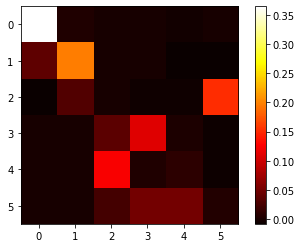

In [217]:
plot_heat_map(type_temperature_prob, type_temperature_quetelet)

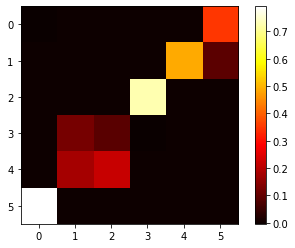

In [218]:
plot_heat_map(type_magnitude_prob, type_magnitude_quetelet)